## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [16]:
##TRAIN
import os
import os.path
from pathlib import Path
No_Data_Path = Path("sample_data/No")
Yes_Data_Path = Path("sample_data/Yes")

No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [17]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('sample_data/No/no1256.jpg'), PosixPath('sample_data/No/no1061.jpg'), PosixPath('sample_data/No/no413.jpg'), PosixPath('sample_data/No/no1245.jpg'), PosixPath('sample_data/No/no526.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('sample_data/Yes/y581.jpg'), PosixPath('sample_data/Yes/y1345.jpg'), PosixPath('sample_data/Yes/y1077.jpg'), PosixPath('sample_data/Yes/y141.jpg'), PosixPath('sample_data/Yes/y1116.jpg')]


In [18]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [19]:
print(Yes_No_List[0:10])

[PosixPath('sample_data/No/no1256.jpg'), PosixPath('sample_data/No/no1061.jpg'), PosixPath('sample_data/No/no413.jpg'), PosixPath('sample_data/No/no1245.jpg'), PosixPath('sample_data/No/no526.jpg'), PosixPath('sample_data/No/no787.jpg'), PosixPath('sample_data/No/no986.jpg'), PosixPath('sample_data/No/no1217.jpg'), PosixPath('sample_data/No/no421.jpg'), PosixPath('sample_data/No/no742.jpg')]


In [20]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [21]:
print(JPG_Labels[0:10])
print("NO COUNTING: ", JPG_Labels.count("No"))
print("YES COUNTING: ", JPG_Labels.count("Yes"))

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']
NO COUNTING:  1500
YES COUNTING:  1500


In [22]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")


In [23]:
##TEST
Prediction_Path = Path("drive/MyDrive/pred")
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))


In [28]:
print(Test_JPG_Labels[0:5])

[]


In [29]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [30]:
print(Test_Data.head())

Empty DataFrame
Columns: [JPG, TUMOR_CATEGORY]
Index: []


In [31]:
# Main Train Data
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)
print(Main_Train_Data.head(-1))

                            JPG TUMOR_CATEGORY
0     sample_data/No/no1256.jpg             No
1     sample_data/No/no1061.jpg             No
2      sample_data/No/no413.jpg             No
3     sample_data/No/no1245.jpg             No
4      sample_data/No/no526.jpg             No
...                         ...            ...
2994   sample_data/Yes/y317.jpg            Yes
2995   sample_data/Yes/y700.jpg            Yes
2996   sample_data/Yes/y608.jpg            Yes
2997   sample_data/Yes/y598.jpg            Yes
2998  sample_data/Yes/y1480.jpg            Yes

[2999 rows x 2 columns]


In [32]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
print(Main_Train_Data.head(-1))

                            JPG TUMOR_CATEGORY
0     sample_data/Yes/y1112.jpg            Yes
1      sample_data/Yes/y712.jpg            Yes
2      sample_data/No/no275.jpg             No
3      sample_data/Yes/y597.jpg            Yes
4      sample_data/No/no521.jpg             No
...                         ...            ...
2994   sample_data/Yes/y430.jpg            Yes
2995   sample_data/Yes/y646.jpg            Yes
2996  sample_data/Yes/y1430.jpg            Yes
2997  sample_data/No/no1104.jpg             No
2998   sample_data/Yes/y496.jpg            Yes

[2999 rows x 2 columns]


In [33]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [34]:
print(train_data.shape)

(2700, 2)


In [35]:
print(train_data.head())

                            JPG TUMOR_CATEGORY
433    sample_data/Yes/y764.jpg            Yes
1151  sample_data/Yes/y1273.jpg            Yes
73    sample_data/Yes/y1311.jpg            Yes
1536   sample_data/Yes/y321.jpg            Yes
2709    sample_data/No/no58.jpg             No


In [36]:
print(test_data.shape)

(300, 2)


In [37]:
print(test_data.head())

                            JPG TUMOR_CATEGORY
1801   sample_data/Yes/y686.jpg            Yes
1190   sample_data/No/no630.jpg             No
1817  sample_data/No/no1427.jpg             No
251   sample_data/No/no1307.jpg             No
2505   sample_data/No/no897.jpg             No


### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [38]:
### YOUR CODE HERE
#IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras.optimizers import RMSprop,Adam
Generator_Basic = ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [39]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [40]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [41]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


In [42]:
#CNN MODEL FOR NON-DIVERSIFICATION
#MODEL STRUCTURE
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [43]:
#MODEL COMPILE
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [45]:
#MODEL FITTING
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=10,steps_per_epoch=120)

Epoch 1/10
120/120 [==============================] - 283s 2s/step - loss: 0.3591 - accuracy: 0.8452 - val_loss: 0.2636 - val_accuracy: 0.8963
Epoch 2/10
120/120 [==============================] - 280s 2s/step - loss: 0.2819 - accuracy: 0.8870 - val_loss: 0.2181 - val_accuracy: 0.9148
Epoch 3/10
120/120 [==============================] - 285s 2s/step - loss: 0.2246 - accuracy: 0.9138 - val_loss: 0.4223 - val_accuracy: 0.8148
Epoch 4/10
120/120 [==============================] - 284s 2s/step - loss: 0.1823 - accuracy: 0.9259 - val_loss: 0.1234 - val_accuracy: 0.9630
Epoch 5/10
120/120 [==============================] - 290s 2s/step - loss: 0.1280 - accuracy: 0.9569 - val_loss: 0.1179 - val_accuracy: 0.9556
Epoch 6/10
120/120 [==============================] - 287s 2s/step - loss: 0.1284 - accuracy: 0.9544 - val_loss: 0.0968 - val_accuracy: 0.9778
Epoch 7/10
120/120 [==============================] - 289s 2s/step - loss: 0.0959 - accuracy: 0.9640 - val_loss: 0.1311 - val_accuracy: 0.9519

In [46]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [47]:
### YOUR CODE HERE
# Evaluate performance on training set
train_loss, train_accuracy = Model.evaluate(Train_Set)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate performance on test set
test_loss, test_accuracy = Model.evaluate(Test_Set)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


122/122 [==============================] - 71s 579ms/step - loss: 0.0333 - accuracy: 0.9897
Training Loss: 0.0333
Training Accuracy: 0.9897
15/15 [==============================] - 8s 540ms/step - loss: 0.1136 - accuracy: 0.9533
Test Loss: 0.1136
Test Accuracy: 0.9533


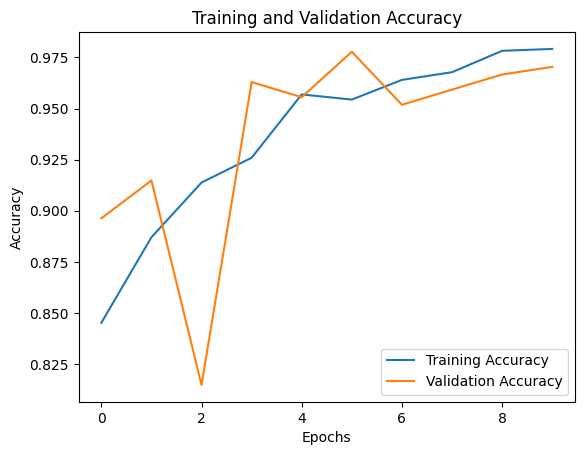

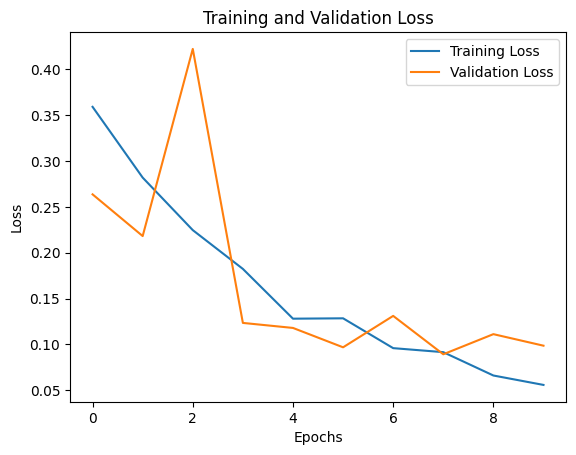

In [48]:
# Plot training and validation accuracy
plt.plot(ANN_Model.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_Model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(ANN_Model.history['loss'], label='Training Loss')
plt.plot(ANN_Model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
